Building 2 Recurrent neural networks with one long-short-term memory to model a time series and coparing them.

In [19]:
# initial imports

import numpy as np
import tensorflow as tf
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping

#gloabl variables
seed = 42

In [2]:
# initializing the variables for the sequence
start = 0
finish = 14 * np.pi
step = 10000

# setting the time
t = np.linspace(start, finish, step)

# creating the function
function_f = np.cos(t)


In [3]:
# since we have 10000 values, we will split the values into training: 8000, validation 1000, test 1000.
training_size = 8000
validation_size = 1000
test_size = 1000
window_size = 10

# spliting into training, validation and test sets
train = function_f[: training_size]
val = function_f[training_size : training_size + validation_size]
test = function_f[training_size + validation_size:]

In [4]:
# function to convert the time series
def conversion(dataset, steps):

  x = []
  y = []

  for i in range(len(dataset) - steps) :
    a = dataset[i : i + steps]
    x.append(a)
    y.append(dataset[i + steps])
  return np.array(x), np.array(y)

In [5]:
# converting the sets

x_train, y_train = conversion(train, window_size)
x_val, y_val = conversion(val, window_size)
x_test, y_test   = conversion(test, window_size)

In [13]:
np.random.seed(seed)

# converting the datasets to LSTM friendly format
x_train_lstm = np.reshape(x_train, (-1, 1, window_size))
x_val_lstm = np.reshape(x_val, (-1, 1, window_size))
x_test_lstm = np.reshape(x_test, (-1, 1, window_size))

# creating the sequantial model
model = tf.keras.Sequential([
    LSTM(100,
         input_shape = (1, window_size)),
    Dense(1)
])

C:\Users\nomad\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
# compiling the model
model.compile(loss = "mse", optimizer = "adam")

In [15]:
# early stopping and then fitting the model
earlyStopping = EarlyStopping(monitor = "val_loss", patience = 5, restore_best_weights = True)

history_3 = model.fit(x_train_lstm,
                    y_train,
                    epochs = 100,
                    batch_size = 32,
                    validation_data = (x_val_lstm, y_val),
                    callbacks = [earlyStopping])

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0791 - val_loss: 5.7252e-04
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.1215e-04 - val_loss: 5.0226e-04
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.6348e-04 - val_loss: 4.1347e-04
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.0833e-04 - val_loss: 3.7660e-04
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.6969e-04 - val_loss: 3.0304e-04
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.4647e-04 - val_loss: 2.7720e-04
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.2788e-04 - val_loss: 2.5618e-04
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.1040e-04 - val_loss: 2.3681e-04
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.9372e-04 - val_loss: 2.2832e-04
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.8219e-04 - val_loss: 1.8358e-04
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

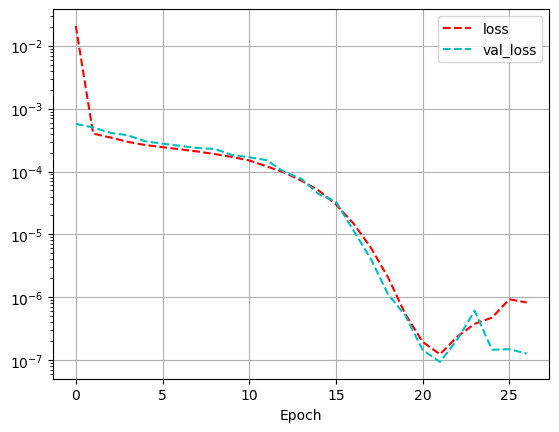

In [20]:
import matplotlib.pyplot as plt

pd.DataFrame(history_3.history).plot(
      grid = True,
      xlabel = "Epoch",
      style = ["r--", "c--"])
plt.yscale("log")
plt.show()

In [21]:
window_size = 20

# converting the sets

x_train, y_train = conversion(train, window_size)
x_val, y_val = conversion(val, window_size)
x_test, y_test   = conversion(test, window_size)

# converting the datasets to LSTM friendly format
x_train_lstm = np.reshape(x_train, (-1, 1, window_size))
x_val_lstm = np.reshape(x_val, (-1, 1, window_size))
x_test_lstm = np.reshape(x_test, (-1, 1, window_size))

# creating the sequantial model
model = tf.keras.Sequential([
    LSTM(100,
         input_shape = (1, window_size)),
    Dense(1)
])

# compiling the model
model.compile(loss = "mse", optimizer = "adam")

C:\Users\nomad\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
# early stopping and then fitting the model
earlyStopping = EarlyStopping(monitor = "val_loss", patience = 5, restore_best_weights = True)

history_4 = model.fit(x_train_lstm,
                    y_train,
                    epochs = 100,
                    batch_size = 32,
                    validation_data = (x_val_lstm, y_val),
                    callbacks = [earlyStopping])

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0325 - val_loss: 0.0015
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9.7236e-04 - val_loss: 9.1171e-04
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.1341e-04 - val_loss: 5.1155e-04
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.8306e-04 - val_loss: 2.5581e-04
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.8379e-04 - val_loss: 1.1225e-04
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.6730e-05 - val_loss: 3.0143e-05
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5067e-05 - val_loss: 4.8323e-06
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.6897e-06 - val_loss: 9.2232e-07
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.0890e-07 - val_loss: 3.8452e-07
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.7310e-07 - val_loss: 3.5142e-07
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - l

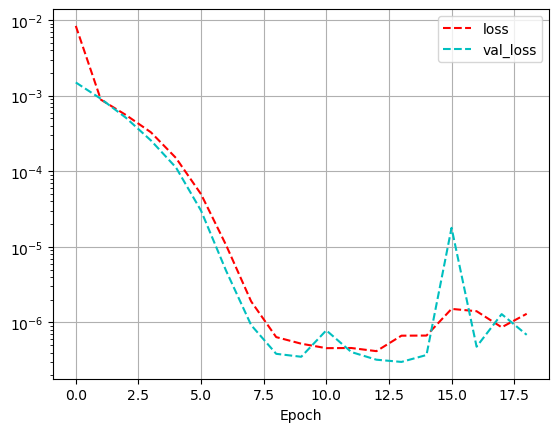

In [23]:
pd.DataFrame(history_4.history).plot(
      grid = True,
      xlabel = "Epoch",
      style = ["r--", "c--"])
plt.yscale("log")
plt.show()

I would argue that the bigger window (20) didn't quite bring us a more stable model, more so than the smaller (10) one did. Either performed well enough, the execution time of the bigger window was faster than the smaller one. In theory though, the bigger the window the better the stability in the values (since it can "see" further), in this example I would say that it is inconclusive.